In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 1d

In [ ]:
class SGD:
    def __init__(self,I,x_lim,a_lim,x=None,a=None,eta=1):
        self.I=I
        self.x_lim=x_lim
        self.a_lim=a_lim
        self.eta=eta
        self.i_range=np.arange(7)-3
        self.x=initialize_params([x_lim]) if x is None else x
        self.a=initialize_params([a_lim]) if a is None else a
        # self.x,self.a=initialize_params(np.array([x_lim,a_lim]))
        self.I_1=diff(I)
    


    def generate_x_i(self):
        return np.round(self.i_range*self.a+self.x).astype(int)
    def loss(self):
        x_i=self.generate_x_i()
        
        return np.sum(self.I[x_i])

    def grad(self):
        x_i=self.generate_x_i()
        loss_a=np.sum(self.I_1[x_i]*self.i_range)
        loss_x=np.sum(self.I_1[x_i])
        return np.array([loss_x,loss_a])
    def fit(self):
        loss_prev=0
        loss_new=self.loss()
        while np.abs(loss_new-loss_prev)>1e-5:
            gradient=self.grad()
            self.x,self.a=np.r_[self.x,self.a]+self.eta*gradient
            loss_prev=loss_new
            loss_new=self.loss()
        print(loss_new)

def initialize_params(lim):
    return [int(np.round(np.random.uniform(low=l[0],high=l[1]))) for l in lim]
def diff(I):
    return I[1:]-I[:-1]


In [ ]:
def generate_int(Q,r):
    return np.cos(Q*r)+.5*np.cos(2.1*Q*r)

In [ ]:
x=np.linspace(-20,20,1001)
y=generate_int(np.array([1]), x)

In [ ]:
plt.plot(y)
plt.axvline(x=500)
plt.axvline(x=650)

In [ ]:
x_lim=[485,515]
a_lim=[145,155]
sgd=SGD(y, x_lim, a_lim,x=500)
sgd.fit()

In [ ]:
fig,ax=plt.subplots()
ax.plot(y)
ax.scatter(sgd.generate_x_i(),y[sgd.generate_x_i()],color='r')

# 2d

In [ ]:
import h5py
import matplotlib.colors as colors


In [ ]:
workingdir='/home/shared/STEM_sample_2/'
f=h5py.File(workingdir+'data.hdf5','r')
I,T=f['I'],f['T']


In [ ]:
# x,y=190,5
x,y=65,65
T_idx=0
data=I[T_idx,x,y,:,:]

In [ ]:
fig,ax=plt.subplots(figsize=(4,4),tight_layout=True)


# vmin,vmax=max(I[:,x,y].min(),1),I[:,x,y].max()
# vmin,vmax=data.min(),data.max()
# im=ax.imshow(data*mask,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax))
mask_Bragg=np.where(com.generate_mask()==1,1,np.nan)
im=ax.imshow(np.log10(data+1)*mask_Bragg,cmap='gray',)
axins=ax.inset_axes([1.05,0,.07,1],transform=ax.transAxes)
tit=ax.set_title('T={:d} K'.format(T[T_idx]+273))
cb=plt.colorbar(im,cax=axins)
cb.ax.set_title(r'$ I(k_x,k_y) $')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
# ax.axvline(x=80,color='b',ls='dashed')
# ax.axvline(x=86,color='b',ls='dashed')
# ax.axhline(y=50,color='y',ls='dashed')
# ax.axhline(y=55,color='y',ls='dashed')

# ax.axvline(x=63,color='b',ls='dashed')
# ax.axvline(x=68,color='b',ls='dashed')
# ax.axhline(y=26,color='y',ls='dashed')
# ax.axhline(y=31,color='y',ls='dashed')

# ax.axvline(x=50,color='b',ls='dashed')
# ax.axvline(x=58,color='b',ls='dashed')
# ax.axhline(y=50,color='y',ls='dashed')
# ax.axhline(y=58,color='y',ls='dashed')
# x_i=sgd_2d.generate_x_i()

# x_i=com.generate_x_i()
# ax.scatter(x_i[:,1],x_i[:,0],color='b',s=2)
com=COM(data=data)
com_i=com.generate_com()
ax.scatter(com_i[:,1],com_i[:,0],color='r',s=2)
# for idx,xy in enumerate(com_i):
#     x,y=xy
#     ax.text(y,x,str(idx))

In [ ]:
for idx,xy in com_i:
    print(xy)

In [ ]:
g1=sgd_2d.b1-sgd_2d.k

In [ ]:
g2=sgd_2d.b2-sgd_2d.k

In [ ]:
np.linalg.norm(g1),np.linalg.norm(g2)

In [ ]:
g1@g2/(np.linalg.norm(g1)*np.linalg.norm(g2))

In [ ]:
sgd_2d.k_lim

In [ ]:
class SGD_2D:
    def __init__(self,I,k_lim,b1_lim,b2_lim,k=None,b1=None,b2=None,eta=1):
        '''
        I: input with linear scale, using log scale
        k: position of the center Bragg peak
        b1: reciprocal lattice vector pointing to the right
        b2: reciprocal lattice vector pointing to the top
        k_lim: [[kx_min,kx_max],[ky_min,ky_max]]
        b1_lim: [[b1x_min,b1x_max],[b1y_min,b1y_max]]
        b2_lim: [[b2x_min,b2x_max],[b2y_min,b2y_max]]
        '''
        self.I,self.k_lim,self.b1_lim,self.b2_lim,self.eta=np.log10(I),k_lim,b1_lim,b2_lim, eta
        # self.i_range=np.array([[-2,2],[-1,2],
        #                        [-2,1],[-1,1],[0,1],[1,1],
        #                        [-1,0],[0,0],[1,0],
        #                        [-1,-1],[0,-1],[1,-1],[2,-1],
        #                        [1,-2],[2,-2]])
        self.i_range=np.array([
                               [-1,1],[0,1],
                               [-1,0],[0,0],[1,0],
                               [0,-1],[1,-1]])
        self.k=np.array(initialize_params(k_lim)) if k is None else k
        self.b1=np.array(initialize_params(b1_lim)) if b1 is None else b1
        self.b2=np.array(initialize_params(b2_lim)) if b2 is None else b2
        # self.g1=self.b1-self.k
        # self.g2=self.b2-self.k
        self.I_1,self.I_2=np.gradient(self.I)
        # self.I_1=np.gradient(self.I,0)
        # self.I_2=np.gradient(self.I,1)
        # self.I_1=self.I[1:,:]-self.I[:-1,:]
        # self.I_2=self.I[:,1:]-self.I[:,:-1]
    def generate_x_i(self):
        # x_i=self.i_range@np.array([self.b1,self.b2])+self.k
        # i,j=self.i_range[:,0],self.i_range[:,1]
        x_i=self.i_range@np.array([self.b1-self.k,self.b2-self.k])+self.k
        # x_i[:,0]=np.where(x_i[:,0]>=self.I.shape[0],self.I.shape[0]-1,x_i[:,0])
        # x_i[:,1]=np.where(x_i[:,1]>=self.I.shape[1],self.I.shape[1]-1,x_i[:,1])
        return np.round(x_i).astype(int)
    def loss(self):
        x_i=self.generate_x_i()
        return np.sum([self.I[tuple(idx)] for idx in x_i])
    def grad(self):
        x_i=self.generate_x_i()
        I_1=[self.I_1[tuple(idx)] for idx in x_i]
        I_2=[self.I_2[tuple(idx)] for idx in x_i]
        i,j=self.i_range[:,0],self.i_range[:,1]
        grad_k_x=np.sum(I_1*(1-i-j))
        grad_k_y=np.sum(I_2*(1-i-j))
        grad_b1_x=np.sum(I_1*i)
        grad_b1_y=np.sum(I_2*i)
        grad_b2_x=np.sum(I_1*j)
        grad_b2_y=np.sum(I_2*j)
        return np.array([grad_k_x,grad_k_y,grad_b1_x,grad_b1_y,grad_b2_x,grad_b2_y])
    def fit(self,thres=1):
        loss_prev=0
        loss_new=self.loss()
        while np.abs(loss_new-loss_prev)>thres:
            gradient=self.grad()
            k_x,k_y,b1_x,b1_y,b2_x,b2_y=np.r_[self.k,self.b1,self.b2]+self.eta*gradient
            k_x=min(max(self.k_lim[0][0],k_x),self.k_lim[0][1])
            k_y=min(max(self.k_lim[1][0],k_y),self.k_lim[1][1])
            b1_x=min(max(self.b1_lim[0][0],b1_x),self.b1_lim[0][1])
            b1_y=min(max(self.b1_lim[1][0],b1_y),self.b1_lim[1][1])
            b2_x=min(max(self.b2_lim[0][0],b2_x),self.b2_lim[0][1])
            b2_y=min(max(self.b2_lim[1][0],b2_y),self.b2_lim[1][1])
            self.k=np.array([k_x,k_y])
            self.b1=np.array([b1_x,b1_y])
            self.b2=np.array([b2_x,b2_y])
            loss_prev=loss_new
            loss_new=self.loss()
            # print(loss_new)

def gradient(I,idx):
    if idx==0:
        return 

In [ ]:
data_log=np.log10(data)
plt.plot(data_log[1:,50]-data_log[:-1,50])
# plt.plot(np.gradient(data_log)[0][:,50])
# plt.plot(sgd_2d.I_1[:,50])

In [ ]:
sgd_2d=SGD_2D(I=data,k_lim=[[50,58],[50,58]], b1_lim=[[50,55],[80,86]], b2_lim=[[26,31],[63,68]],k=[54,54])

In [ ]:
(63+68)/2

In [ ]:
sgd_2d.b1,sgd_2d.b2

In [ ]:
sgd_2d.k

In [ ]:
k_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
b1_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
b2_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
for T_idx in range(1):
# for T_idx in range(I.shape[0]):
    for i in range(I.shape[1]):
        for j in range(I.shape[2]):
            print(i,j)
            sgd_2d=SGD_2D(I=I[T_idx,i,j],k_lim=[[50,58],[50,58]], b1_lim=[[50,55],[80,86]], b2_lim=[[26,31],[63,68]],k=[54,54])
            sgd_2d.fit()
            k_store[T_idx,i,j]=sgd_2d.k
            b1_store[T_idx,i,j]=sgd_2d.b1
            b2_store[T_idx,i,j]=sgd_2d.b2



In [ ]:
k_store.shape

In [ ]:
plt.imshow(k_store[0,:,:,0])

In [ ]:
plt.imshow(g1_norm[0])
plt.colorbar()

In [ ]:
plt.imshow(g2_norm[0])
plt.colorbar()

In [ ]:
g1_store=(b1_store-k_store)
g2_store=(b2_store-k_store)

In [ ]:
g1_norm=np.sqrt(g1_store[:,:,:,0]**2+g1_store[:,:,:,1]**2)

In [ ]:
g2_norm=np.sqrt(g2_store[:,:,:,0]**2+g2_store[:,:,:,1]**2)

In [ ]:
g1_norm[0]/g2_norm[0]

In [ ]:
sgd_2d.fit(thres=1e-2)

In [ ]:
1. out of bounds
2. derivative not smooth, high order may needed
3. restrict boundary when running

In [ ]:
sgd_2d.loss()

In [ ]:
np.r_[sgd_2d.k,sgd_2d.b1,sgd_2d.b2]

In [ ]:
sgd_2d.b1

# COM

In [2]:
import h5py
import matplotlib.colors as colors
from scipy import ndimage


In [3]:
workingdir='/share/kim/STEM_sample_2/'
# workingdir='/home/shared/STEM_sample_2/'
f=h5py.File(workingdir+'data.hdf5','r')
I,T=f['I'],f['T']


In [4]:
# x,y=190,5
x,y=65,65
T_idx=0
data=I[T_idx,x,y,:,:]

In [5]:
import pickle

In [6]:
# %%writefile COM.py
import numpy as np
from scipy import ndimage
from sklearn.neighbors import NearestNeighbors
class COM:
    def __init__(self,data,k0=[54,54],k1=[51,83],k2=[28,65]):
        self.data=data
        self.k0=np.array(k0)
        self.k1=np.array(k1)
        self.k2=np.array(k2)
        self.i_range=np.array([[-2,2],[-1,2],[0,2],
                               [-2,1],[-1,1],[0,1],[1,1],
                               [-1,0],[0,0],[1,0],
                               [-1,-1],[0,-1],[1,-1],[2,-1],
                               [0,-2],[1,-2],[2,-2]])
        self.line=generate_line()
    def generate_x_i(self):
        x_i=self.i_range@np.array([self.k1-self.k0,self.k2-self.k0])+self.k0
        return np.round(x_i).astype(int)
    def generate_mask(self,x_i=None,radius=3):
        if x_i is None:
            x_i=self.generate_x_i()
        mask=np.zeros(self.data.shape,dtype=int)
        x_i_all=[]
        for i in range(-radius,radius+1):
            for j in range(-radius,radius+1):
                x_i_all.append(x_i+np.array([i,j]))
        x_i_all=np.vstack(x_i_all)
        x_i_all[x_i_all<0]=0
        x_i_all[x_i_all[:,0]>=self.data.shape[0]]=self.data.shape[0]
        x_i_all[x_i_all[:,1]>=self.data.shape[1]]=self.data.shape[1]
        mask[tuple(x_i_all.T)]=1
        return mask
    def generate_com(self):
        mask=self.generate_mask()
        lbl=ndimage.label(mask)
        return np.array(ndimage.center_of_mass(self.data,lbl[0],range(1,lbl[1]+1)))

    def average_dist(self):
        com_i=com.generate_com()
        nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(com_i)
        distances, indices = nbrs.kneighbors(com_i)
        return distances[:,1].mean()
    def average_dist_direction(self):
        com_i=com.generate_com()
        dist={}
        ave_dist=[]
        for key,val in self.line.items():
            dist[key]=[]
            for pts_idx in val:
                pts=com_i[pts_idx]
                dist[key].append(distance(pts))
        # return dist
        for key,val in dist.items():
            ave_distance=np.hstack(dist[key]).mean()
            ave_dist.append(ave_distance)
        return np.array(ave_dist)


def generate_line():
    line={}
    line[0]=[[0,1],[2,3,4,5],[6,7,8],[9,10,11,12],[13,14]]
    line[1]=[[1,5],[0,4,8,12],[3,7,11],[2,6,10,14],[9,13]]
    line[2]=[[0,3,6,9],[1,4,7,10,13],[5,8,11,14]]
    return line
def distance(x_i):
    return np.linalg.norm(x_i[:-1]-x_i[1:],axis=1)






In [40]:
%load_ext line_profiler

In [41]:
%lprun -f foo.compute my_func()

UsageError: Could not find module foo.compute.
NameError: name 'foo' is not defined


In [15]:
com=COM(data=data)

In [16]:
com_ij=com.generate_com()

In [17]:
com_ij

array([[  2.28633885,  75.91956261],
       [  4.7314281 ,  47.245127  ],
       [  8.32771621,  18.5771478 ],
       [ 24.49096105,  94.097588  ],
       [ 28.03820793,  65.00027404],
       [ 31.43715986,  36.56663631],
       [ 34.69005326,   7.37240019],
       [ 50.73900871,  83.08799711],
       [ 54.14442172,  54.33707193],
       [ 57.21672063,  25.31258588],
       [ 73.32443507, 101.29352689],
       [ 77.19052874,  72.08156994],
       [ 79.97884701,  43.03541389],
       [ 83.13928945,  14.16520005],
       [100.02484   ,  89.99911198],
       [103.46831022,  61.21932184],
       [106.00526205,  31.96067762]])

In [ ]:
com.generate_x_i()

In [ ]:
com_ij

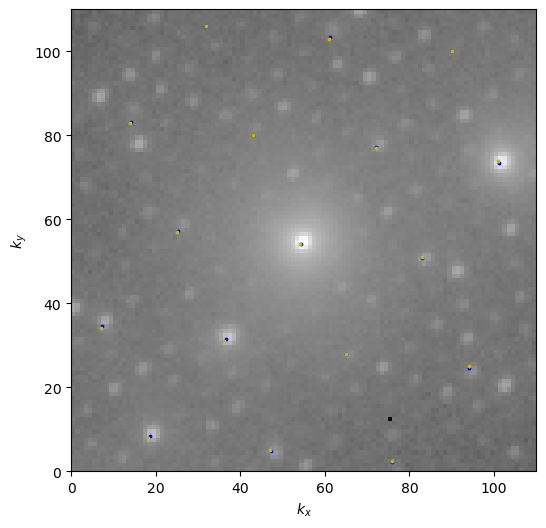

In [28]:
fig,ax=plt.subplots(figsize=(6,6))

vmin,vmax=data.min(),data.max()
im=ax.pcolormesh(data,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax))
# cb=plt.colorbar(im)
# cb.ax.set_title(r'$ I(k_x,k_y) $')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')

# mask_ind=peak_local_max(np.log10(data),threshold_rel=0,min_distance=8)
# ax.scatter(mask_ind[:,1],mask_ind[:,0])
# ax.scatter(brag_peaks[:,1],brag_peaks[:,0])
# ax.scatter([78],[2],c='y')

ax.scatter(com_ij[:,1],com_ij[:,0],color='b',s=3)
# [ax.text(com_ij[idx,1],com_ij[idx,0],f'{idx}',color='r') for idx in range(com_ij.shape[0])]
ax.scatter(q.bragg_peaks[:,1],q.bragg_peaks[:,0],color='y',s=3)
# [ax.text(com_ij[idx,1],com_ij[idx,0],f'{idx}',color='b') for idx in range(com_ij.shape[0])]

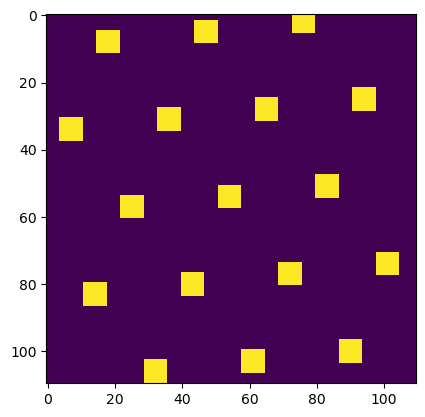

In [81]:
plt.imshow(com.generate_mask())
# plt.savefig('tmp.png')

In [12]:
brag_peaks=np.array([[ 55,  55],
       [ 59,  26],
       [ 73, 101],
       [ 86,  15],
       [ 32,  37],
       [ 36,   8],
       [ 78,  73],
       [ 51,  84],
       [ 28,  66],
       [ 24,  95],
       [ 82,  44],
       [  9,  19],
       [101,  91],
       [106, 62],
       [110,35],
       [5,49],
       [2,78]       ])

In [ ]:
(com.generate_com())

In [ ]:
ave_dist=np.zeros((I.shape[0],I.shape[1],I.shape[2],3))
# b1_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
# b2_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
# for T_idx in [10]:
for T_idx in range(I.shape[0]):
    for i in range(I.shape[1]):
        print(f'{T_idx}:{i}',end='\r')
        for j in range(I.shape[2]):
            com=COM(data=I[T_idx,i,j])
            ave_dist[T_idx,i,j]=com.average_dist_direction()
np.save('strainmap.npy',ave_dist)

In [10]:
rs.keys()

dict_keys(['mean', 'std', 'length', 'x', 'y', 'T_list', 'T', 'args'])

In [7]:
with open('q_Txy_count_pts_outlier_sample_2_auto_bragg.pickle','rb') as f:
    rs=pickle.load(f)

In [8]:
ave_dist=np.load('strainmap.npy')

In [9]:
def generate_mask_line(x,y):
    '''
    x: (min,max)
    y: (min,max)
    '''
    i_idx,j_idx=np.meshgrid(np.arange(200),np.arange(200),indexing='ij')
    x_min,x_max=x
    y_min,y_max=y
    return (i_idx<((y_max-y_min)/(x_max-x_min)*j_idx+y_min))

In [13]:
mask=generate_mask_line((0,81), (178,199))

In [ ]:
data[:,:,0]

In [ ]:
T_idx_list=np.arange(34)
fig,axs=plt.subplots(T_idx_list.shape[0],6,figsize=(20,3*T_idx_list.shape[0]),tight_layout=True)
for T_idx in T_idx_list:
    data=ave_dist[T_idx,:,:]*np.where(mask[:,:,np.newaxis]==0,np.nan,1)
    ax=axs[T_idx]
    for i in range(3):
        im=ax[i].imshow(data[:,:,i])
        ax[i].set_title(f'$b_{i}$')
        axins=ax[i].inset_axes([1.05,0,.07,1],transform=ax[i].transAxes)
        cbar=plt.colorbar(im,cax=axins)

    im=ax[3].imshow(data.mean(axis=-1))
    axins=ax[3].inset_axes([1.05,0,.07,1],transform=ax[3].transAxes)
    cbar=plt.colorbar(im,cax=axins)
    im=ax[4].imshow(data[:,:,1]/data[:,:,0])
    axins=ax[4].inset_axes([1.05,0,.07,1],transform=ax[4].transAxes)
    cbar=plt.colorbar(im,cax=axins)
    im=ax[5].imshow(data[:,:,2]/data[:,:,0])
    axins=ax[5].inset_axes([1.05,0,.07,1],transform=ax[5].transAxes)
    cbar=plt.colorbar(im,cax=axins)

    ax[3].set_title(f'$(b_0+b_1+b_2)/3$')
    ax[4].set_title(f'$b_1/b_0$')
    ax[5].set_title(f'$b_2/b_0$')

    [ax.set_xlabel('y') for ax in ax]
    [ax.set_ylabel('x') for ax in ax]
    [ax.text(-0.2,1.05,f'T={T[T_idx]+273}(K)',transform=ax.transAxes) for ax in ax]
# plt.colorbar()

fig.savefig('strainmap.png',dpi=300)


In [7]:
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import FunctionTransformer,StandardScaler
from sklearn.pipeline import Pipeline
import pickle
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from matplotlib.animation import FuncAnimation
class GMM_model:
    def __init__(self,filename,mask=None):
        '''
        rs: (T_idx,x_idx,y_idx)
        mask: ((x_min,x_max),(y_min,y_max))
        '''
        self.filename=filename
        self.mask=mask
        self.rs=self.load()
        self.labels_={}
        self.X_orig={}
        self.X={}
        self.bic={}
        self.silhouette={}
        self.search={}
        self.labels_grid={}

    def load(self):
        with open(self.filename,'rb') as f:
            rs=pickle.load(f)
        # if self.mask is not None:
        #     for key in ['mean','std','length']:
        #         rs[key]=rs[key][:,self.mask[0][0]:self.mask[0][1],self.mask[1][0]:self.mask[1][1]]
        #     rs['x']=np.arange(self.mask[0][0],self.mask[0][1])
        #     rs['y']=np.arange(self.mask[1][0],self.mask[1][1])
        if self.mask is None:
            self.mask=(np.ones(rs['mean'].shape[1:])==1)
        rs['T']=rs['T']+273
        return rs

    def preprocessing(self,kind):
        self.X_orig[kind]=self.rs[kind][:,self.mask].T
        # self.X_orig[kind]=self.rs[kind].reshape((self.rs[kind].shape[0],-1)).T

        # estimators=[('standardize',StandardScaler()),]
        estimators=[('T',FunctionTransformer(lambda x:x.T)),('standardize',StandardScaler()),('T2',FunctionTransformer(lambda x:x.T)),]

        pipeline=Pipeline(estimators)
        self.X[kind]=pipeline.fit_transform(self.X_orig[kind])
        
    def GMM_fit(self,kind,k=3):
        self.preprocessing(kind)
        self.k=k
        self.gm=GaussianMixture(n_components=self.k)
        self.labels_[kind]=self.gm.fit_predict(self.X[kind])
        
    
    def GMM_hypertuning(self,kind,k_range=np.arange(2,7),trial=10):
        self.bic[kind]=pd.DataFrame()
        self.silhouette[kind]=pd.DataFrame()
        if not kind in self.X:
            self.preprocessing(kind)
        for k in k_range:
            bic_k=[]
            silhouette_k=[]
            for i in range(trial):
                print('\r k={} i={}'.format(k,i),end='',flush=True)
                self.GMM_fit(kind,k)
                self.gm.fit(self.X[kind])    
                bic_k.append(self.gm.bic(self.X[kind]))
                silhouette_k.append(silhouette_score(self.X[kind],self.gm.fit_predict(self.X[kind])))
            self.bic[kind][k]=bic_k
            self.silhouette[kind][k]=silhouette_k
    
    def GMM_hypertuning_GridSearchCV(self,kind,k_range=np.arange(2,7),trial=10):
        if not kind in self.search:
            if not kind in self.X:
                self.preprocessing(kind)
            def scoring(clf,X):
                labels_=clf.fit_predict(self.X[kind])
                return {'bic':clf.bic(self.X[kind]),'silhouette':silhouette_score(self.X[kind], labels_)}
            self.k_range=k_range
            self.search[kind]=GridSearchCV(GaussianMixture(n_init=trial), param_grid={"n_components":k_range},n_jobs=-1,return_train_score=True,scoring=scoring,verbose=4,cv=[(slice(None), slice(None))],refit=False)
            self.search[kind].fit(self.X[kind])


    def GMM_plot(self,kind,permutation=None,ax=None):
        if permutation is None:
            permutation=np.arange(self.k)
        offset=permutation-np.arange(self.k)
        if ax is None:
            fig, ax= plt.subplots(1,3,figsize=(13,4),tight_layout=True)
        cmap = plt.get_cmap('plasma', self.k)
        labels_=self.labels_[kind]
        labels_offset=np.array([offset[labels_[idx]] for idx in range(labels_.shape[0])])
        labels_=labels_+labels_offset
        cnt=0
        self.labels_grid[kind]=np.zeros(self.rs['mean'].shape[1:],)
        for i in self.rs['x']:
            for j in self.rs['y']:
                if self.mask[i,j]:
                    self.labels_grid[kind][i,j]=labels_[cnt]
                    cnt+=1
                else:
                    self.labels_grid[kind][i,j]=np.nan

        
        im=ax[0].imshow(self.labels_grid[kind],cmap=cmap,extent=(self.rs['y'][0],self.rs['y'][-1],self.rs['x'][-1],self.rs['x'][0]))
        plt.colorbar(im,ax=ax[0])
        bic_text='BIC={:.0f}, Silhouette={:.2f}'.format(self.gm.bic(self.X[kind]),silhouette_score(self.X[kind],labels_))
        for idx in range(self.k):
            bic_text=bic_text+'\n{}:{}'.format(idx,np.sum(labels_==idx))
        ax[0].set_title(bic_text)
        ax[0].set_xlabel('y')
        ax[0].set_ylabel('x')

        color_list=[cmap(idx) for idx in range(self.k)]
        for n,color in zip(range(self.k),color_list):
            mean=self.X[kind][labels_==n].T.mean(axis=-1)
            ax[1].plot(self.rs['T'],mean,color=color,label=str(n))
            error=self.X[kind][labels_==n].T.std(axis=-1)
            ax[1].fill_between(self.rs['T'],mean-error,mean+error,color=color,alpha=0.5)
        ax[1].set_xlabel('T (K)')
        ax[1].set_ylabel('z-score of {}'.format(kind))
        ax[1].legend()

        for n,color in zip(range(self.k),color_list):
            mean=self.X_orig[kind][labels_==n].T.mean(axis=-1)
            ax[2].plot(self.rs['T'],mean,color=color,label=str(n))
            error=self.X_orig[kind][labels_==n].T.std(axis=-1)
            ax[2].fill_between(self.rs['T'],mean-error,mean+error,color=color,alpha=0.5)
        ax[2].set_xlabel('T (K)')
        ax[2].set_ylabel(kind)
        ax[2].legend()

    def GMM_plot_single(self,kind,cluster_list,cond=None,errorbar=True,ax=None,ylim=None):
        if ax is None:
            fig,ax=plt.subplots()
        labels_=self.labels_[kind]

        cmap = plt.get_cmap('plasma', self.k)
        color_list=[cmap(idx) for idx in range(self.k)]
        for n in cluster_list:
            mean=self.X_orig[kind][labels_==n].T.mean(axis=-1)
            ax.plot(self.rs['T'],mean,color=color_list[n],label=str(n))
            if errorbar:
                error=self.X_orig[kind][labels_==n].T.std(axis=-1)
                ax.fill_between(self.rs['T'],mean-error,mean+error,color=color_list[n],alpha=0.5)
        ax.set_xlabel('T (K)')
        if ylim is not None:
            ax.set_ylim(ylim)
        ax.set_ylabel(kind)
        ax.legend()
        if cond is not None:
            ax2=ax.twinx()
            ax2.plot(cond[:,0],cond[:,1],color='k',ls='dashed')
            ax2.set_xlim(self.rs['T'][0],self.rs['T'][-1])
            ax2.set_ylabel('R ($\Omega$)')
            ax2.tick_params(axis='y', labelcolor='k')

    def convert_real_space(self,kind):
        labels_grid=self.labels_grid[kind]
        self.ij={}
        for i in (self.rs['x']):
            for j in (self.rs['y']):
                label=-1 if np.isnan(labels_grid[i,j]) else labels_grid[i,j]
                if label in self.ij:
                    self.ij[label].append((i,j))
                else:
                    self.ij[label]=[]
        
        # for cluster in range(self.k):
        #     idx,=np.where(labels_==cluster)
        #     self.ij[cluster]=np.unravel_index(idx, self.rs[kind].shape[1:])
        return self.ij



In [11]:
with open('count_pts_outlier.pickle','rb') as f:
    count_pts_outlier_sample_2=pickle.load(f)

In [12]:
ave_dist[10,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

29.137189943024797

In [13]:
ave_dist[10,:,:,1][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

28.48824727588973

In [14]:
ave_dist[10,:,:,2][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

29.167092653116764

In [15]:
(29.137189943024797+28.48824727588973+29.167092653116764)/3

28.9308432906771

In [62]:
count_pts_outlier_sample_2.ij.keys()

dict_keys([0.0, 3.0, 1.0, 2.0, -1])

In [66]:
ave_dist[1].shape

(200, 200, 3)

In [53]:
import scipy.stats

def t_test_confidence_interval(data, confidence_level=0.95):
    mean = np.mean(data)  # Compute the mean of the data
    sem = scipy.stats.sem(data)  # Compute the standard error of the mean
    deg_freedom = len(data) - 1  # Calculate the degrees of freedom
    t_value = scipy.stats.t.ppf((1 + confidence_level) / 2, deg_freedom)  # Calculate the t-value

    margin_of_error = t_value * sem  # Calculate the margin of error

    return margin_of_error,mean

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    # lower_bound = mean - sem
    # upper_bound = mean + sem

    return lower_bound, upper_bound, mean


In [71]:
b_ave={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}
b_ave_err={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}
a_ave={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}
a_ave_err={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}


for T_idx in range(T.shape[0]):
    b=[ave_dist[T_idx,:,:,idx] for idx in range(3)]
    a=[1/ave_dist[T_idx,:,:,idx] for idx in range(3)]

    for key in range(count_pts_outlier_sample_2.k):
        val=count_pts_outlier_sample_2.ij[key]
        b_list=[b[idx][tuple(np.array(val).T)] for idx in range(3)]
        a_list=[a[idx][tuple(np.array(val).T)] for idx in range(3)]

        for idx in range(3):
            b_ave_err[idx][T_idx,key],b_ave[idx][T_idx,key]=t_test_confidence_interval(b_list[idx])
            a_ave_err[idx][T_idx,key],a_ave[idx][T_idx,key]=t_test_confidence_interval(a_list[idx])

        b_ave_err['ave'][T_idx,key],b_ave['ave'][T_idx,key]=t_test_confidence_interval((b_list[0]+b_list[1]+b_list[2])/3)
        a_ave_err['ave'][T_idx,key],a_ave['ave'][T_idx,key]=t_test_confidence_interval((a_list[0]+a_list[1]+a_list[2])/3)

In [95]:
b_ave_all=b_ave['ave'].mean()
a_ave_all=a_ave['ave'].mean()
    
b_ave_pct={key:100*(b_ave[key]-b_ave_all)/b_ave_all for key in b_ave.keys()}
a_ave_pct={key:100*(a_ave[key]-a_ave_all)/a_ave_all for key in a_ave.keys()}

b_ave_err_pct={key:100*(b_ave_err[key])/b_ave_all for key in b_ave_err.keys()}
a_ave_err_pct={key:100*(a_ave_err[key])/a_ave_all for key in a_ave_err.keys()}

In [80]:
b_ave['ave'].mean()

28.985231600765026

In [72]:
ave_dist.mean()

28.985555190243517

In [85]:
(1/ave_dist).mean()

0.03450408807536791

In [86]:
b_ave_err_pct

{'ave': array([[8.70670569e-05, 8.19542309e-05, 5.84097641e-05, 8.05608633e-05],
        [8.75670860e-05, 8.21560362e-05, 5.68713261e-05, 8.13115421e-05],
        [8.41087360e-05, 8.53850192e-05, 6.05520781e-05, 8.31182442e-05],
        [8.45953097e-05, 8.57931152e-05, 5.89119536e-05, 8.37581480e-05],
        [8.31200075e-05, 8.55845545e-05, 5.62091567e-05, 8.27400160e-05],
        [8.15535105e-05, 8.36132560e-05, 5.57698732e-05, 8.07205770e-05],
        [8.19031037e-05, 8.51687596e-05, 5.59732494e-05, 8.58073159e-05],
        [8.07457525e-05, 8.37341398e-05, 5.64285506e-05, 8.39254749e-05],
        [8.10597716e-05, 8.32785580e-05, 5.64458454e-05, 8.39827262e-05],
        [7.98178719e-05, 8.18352383e-05, 5.55695759e-05, 8.14785489e-05],
        [7.89179608e-05, 8.14494711e-05, 5.39701040e-05, 8.09807937e-05],
        [7.81956366e-05, 8.11103224e-05, 5.37075341e-05, 8.02710401e-05],
        [7.84160781e-05, 8.15801013e-05, 5.48178707e-05, 8.18049000e-05],
        [7.78223517e-05, 8.1480

In [16]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)]

array([29.17027238, 29.15999546, 29.14838742, ..., 29.19281173,
       29.21728035, 29.21456832])

In [17]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

29.15078160554829

In [21]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].std()

0.08566614361096998

In [24]:
scipy.stats.sem(ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)])

0.0009405914393174859

In [35]:
scipy.stats.sem(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)])


9.791060689217113e-07

In [38]:
t_test_confidence_interval(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)])

(0.034265759404407514, 0.03426771761654536, 0.03426673851047644)

In [55]:
a_ave_err[0][0,3]

1.919251770454614e-06

In [46]:
a_ave_ub[0][0,3]

0.03426771761654536

In [47]:
a_ave[0][0,3]

0.03426673851047644

In [30]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)]).mean()

0.03430469332317787

In [29]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[1]).T)]).mean()

0.034227301958065545

In [31]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[2]).T)]).mean()

0.03420556437796542

In [32]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)]).mean()

0.03426673851047644

In [27]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[2]).T)]).mean()

0.03420556437796542

In [20]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)].mean()

29.183049734727565

In [ ]:
count_pts_outlier_sample_2.ij[0]

In [102]:
a_ave_ub[0][0,0]

0.03430579854899645

In [103]:
a_ave[0][0,0]

0.03430469332317787

[(130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0)]

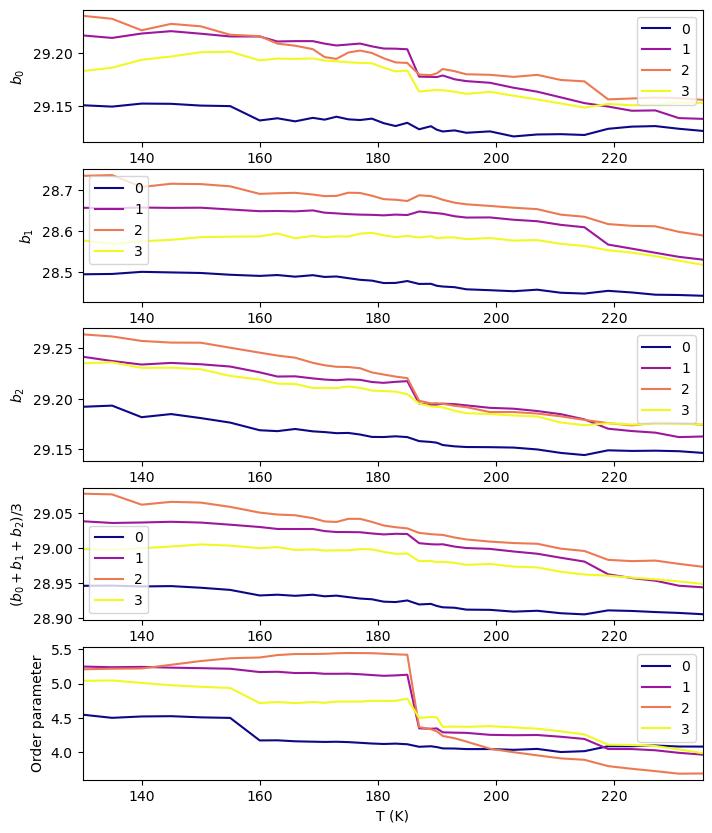

In [68]:
fig,axs=plt.subplots(5,1,figsize=(8,10))
cmap = plt.get_cmap('plasma', count_pts_outlier_sample_2.k)
color_list=[cmap(idx) for idx in range(count_pts_outlier_sample_2.k)]
ax=axs[0]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b0_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$b_0$')

ax=axs[1]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b1_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$b_1$')
ax=axs[2]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b2_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$b_2$')
ax=axs[3]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$(b_0+b_1+b_2)/3$')

ax=axs[4]
count_pts_outlier_sample_2.GMM_plot_single('mean', [0,1,2,3], errorbar=False,cond=None,ax=ax)
ax.set_ylabel('Order parameter')

[ax.set_xlim(T[0]+273,T[-1]+273) for ax in axs]


In [74]:
a_ave_all=a_ave['ave'].mean()

# a0_ave_pct=(a0_ave-a_ave_all)/a_ave_all
# a1_ave_pct=(a1_ave-a_ave_all)/a_ave_all
# a2_ave_pct=(a2_ave-a_ave_all)/a_ave_all
# a_ave_pct=(a_ave-a_ave_all)/a_ave_all

# a_ave_lb_pct={key:(a_ave_lb[key]-a_ave_all)/a_ave_all for key in a_ave_lb.keys()}
# a_ave_ub_pct={key:(a_ave_ub[key]-a_ave_all)/a_ave_all for key in a_ave_ub.keys()}
a_ave_pct={key:(a_ave[key]-a_ave_all)/a_ave_all for key in a_ave.keys()}

In [50]:
a_ave_ub[0][:,3]

array([0.03426772, 0.03426412, 0.03425534, 0.0342517 , 0.03424699,
       0.03424633, 0.03425603, 0.03425397, 0.03425439, 0.03425379,
       0.03425608, 0.03425697, 0.0342581 , 0.03425869, 0.03425902,
       0.034264  , 0.03426801, 0.03426717, 0.03429022, 0.03428894,
       0.03428835, 0.03428873, 0.03429032, 0.03429269, 0.0342904 ,
       0.03429477, 0.03429882, 0.03430325, 0.03430777, 0.03430381,
       0.03430525, 0.03430476, 0.03430231, 0.03430242])

In [51]:
a_ave_lb[0][:,3]

array([0.03426576, 0.03426212, 0.03425334, 0.03424967, 0.03424499,
       0.0342444 , 0.03425388, 0.03425193, 0.03425226, 0.03425181,
       0.03425409, 0.03425505, 0.0342561 , 0.03425673, 0.03425715,
       0.03426214, 0.03426614, 0.03426537, 0.03428859, 0.03428737,
       0.03428677, 0.03428716, 0.03428878, 0.03429117, 0.03428895,
       0.03429326, 0.03429738, 0.0343019 , 0.03430645, 0.03430244,
       0.03430391, 0.03430343, 0.03430108, 0.03430122])

In [60]:
color_list[i]

(0.050383, 0.029803, 0.527975, 1.0)

[(130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0)]

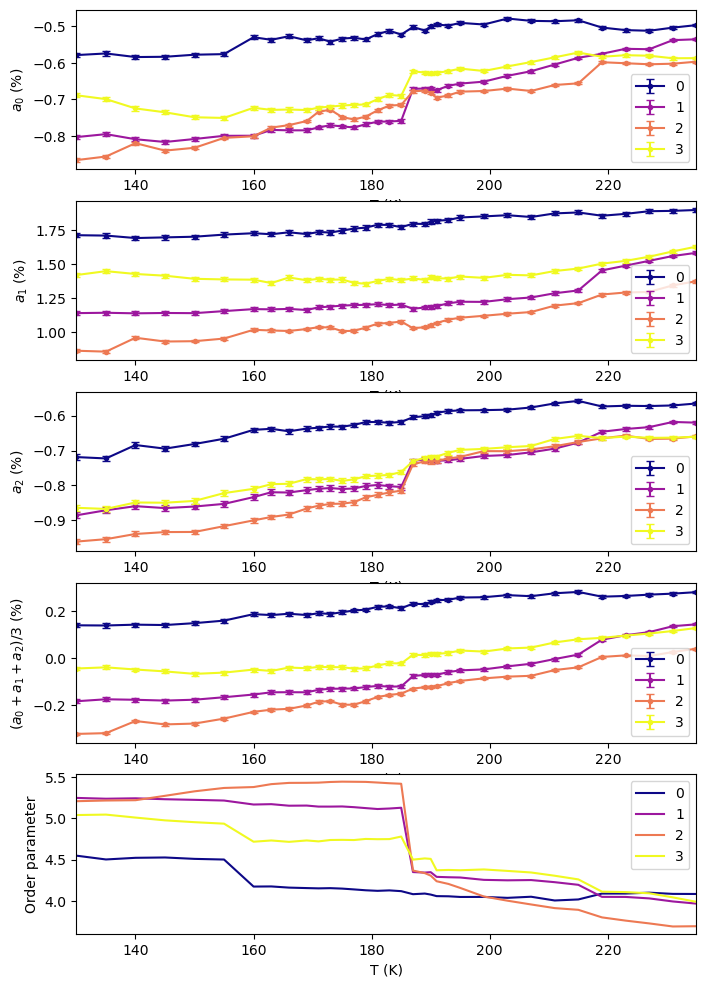

In [96]:
fig,axs=plt.subplots(5,1,figsize=(8,12))
cmap = plt.get_cmap('plasma', count_pts_outlier_sample_2.k)
color_list=[cmap(idx) for idx in range(count_pts_outlier_sample_2.k)]

for idx in range(3):
    ax=axs[idx]
    for i in range(count_pts_outlier_sample_2.k):
        ax.errorbar(T[:]+273,a_ave_pct[idx][:,i],a_ave_err_pct[idx][:,i],fmt='.-', capsize=3,color=color_list[i],label=str(i))
    ax.legend()
    ax.set_xlabel('T (K)')
    ax.set_ylabel(f'$a_{idx}$ (%)')

ax=axs[3]
for i in range(count_pts_outlier_sample_2.k):
        ax.errorbar(T[:]+273,a_ave_pct['ave'][:,i],a_ave_err_pct['ave'][:,i],fmt='.-', capsize=3,color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$(a_0+a_1+a_2)/3$ (%)')

ax=axs[4]
count_pts_outlier_sample_2.GMM_plot_single('mean', [0,1,2,3], errorbar=False,cond=None,ax=ax)
ax.set_ylabel('Order parameter')

[ax.set_xlim(T[0]+273,T[-1]+273) for ax in axs]


In [ ]:
fig,axs=plt.subplots(2,1,figsize=(8,6))
cmap = plt.get_cmap('plasma', count_pts_outlier_sample_2.k)
color_list=[cmap(idx) for idx in range(count_pts_outlier_sample_2.k)]
ax=axs[0]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$(b_0+b_1+b_2)/3$')

ax=axs[1]
count_pts_outlier_sample_2.GMM_plot_single('mean', [0,1,2,3], errorbar=False,cond=None,ax=ax)


In [ ]:
count_pts_outlier_sample_2.ij[0]

In [ ]:
plt.imshow(ave_dist[10])
plt.colorbar()

In [ ]:
plt.imshow(ave_dist[0])
plt.colorbar()

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(com_i)

In [ ]:
distances, indices = nbrs.kneighbors(com_i)

In [ ]:
distances[:,1].mean()

In [ ]:
mask=com.generate_mask()

In [ ]:
plt.imshow(com.generate_mask())

In [ ]:
lbl=ndimage.label(mask)

In [ ]:
lbl[1]

In [ ]:
ndimage.center_of_mass(data,lbl[0],range(1,lbl[1]+1))

In [ ]:
zz=(com.generate_x_i())

In [ ]:
np.vstack(zz).shape

In [ ]:
b = np.array(([0,1,1,0],
              [0,1,0,0],
              [0,0,0,0],
              [0,0,1,1],
              [0,0,1,1]))

In [ ]:
lbl = ndimage.label(b)[0]

In [ ]:
lbl.min()

In [ ]:
ndimage.center_of_mass(b, lbl, [1,2])

# Test q_stat.py

In [35]:
import q_stat

In [36]:
import importlib

In [48]:
importlib.reload(q_stat)

<module 'q_stat' from '/home/hp364/STEM/4D/q_stat.py'>

In [49]:
q=q_stat.q_stat(T_idx,x,y,workingdir,auto=True)

In [50]:
q.bragg_peaks

array([[  2.28633897,  75.9195626 ],
       [  4.73142807,  47.24512703],
       [  8.32771609,  18.57714784],
       [ 24.49096106,  94.09758801],
       [ 28.03820779,  65.00027398],
       [ 31.43715984,  36.56663639],
       [ 34.69005323,   7.37240014],
       [ 50.73900875,  83.08799717],
       [ 54.1444218 ,  54.33707196],
       [ 57.21672058,  25.31258587],
       [ 73.32443499, 101.2935269 ],
       [ 77.19052879,  72.08157001],
       [ 79.97884714,  43.03541387],
       [ 83.13928925,  14.16520011],
       [100.02484011,  89.99911181],
       [103.46831019,  61.21932182],
       [106.00526221,  31.9606777 ]])

{'mean': 5.357142857142857, 'std': 0.9715336077668173, 'length': 14}

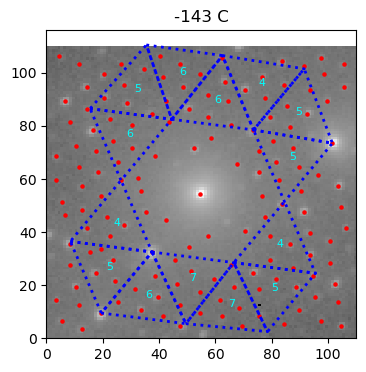

In [47]:
q.count_pts(visualization=True,remove_central_shell=True)

{'mean': 5.5, 'std': 0.9819805060619657, 'length': 14}

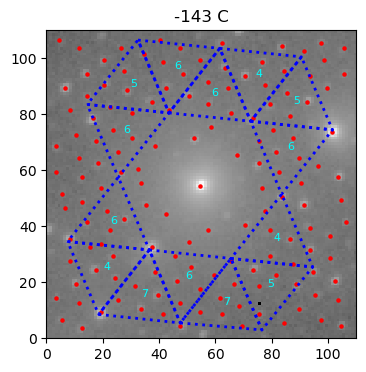

In [ ]:
q.count_pts(visualization=True,remove_central_shell=True)

{'mean': 5.285714285714286, 'std': 0.880630571852711, 'length': 14}

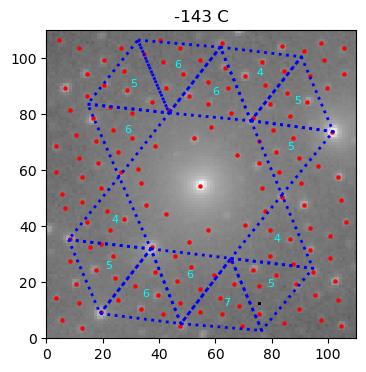

In [51]:
q.count_pts(visualization=True,remove_central_shell=True)

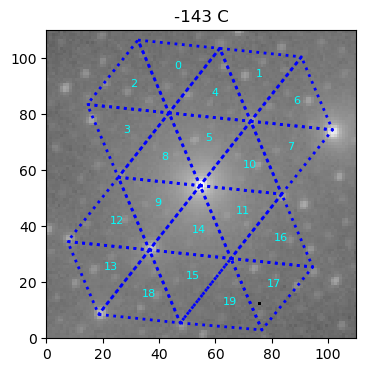

In [10]:
q.visualize_grid()

In [11]:
q.bragg_peaks

array([[  2.48214761,  75.98928762],
       [  4.98288227,  47.01882388],
       [  8.03065416,  18.05144528],
       [ 24.96293645,  94.00584816],
       [ 28.00485451,  64.99894569],
       [ 31.04338086,  36.04791086],
       [ 34.04940707,   7.03375405],
       [ 50.9823721 ,  83.00754228],
       [ 54.0151413 ,  54.02771137],
       [ 57.01501725,  25.02628856],
       [ 73.93890434, 101.03782948],
       [ 77.01633429,  72.00362023],
       [ 79.9963887 ,  43.00284029],
       [ 83.00922125,  14.01618683],
       [100.00187887,  89.99938982],
       [103.0406267 ,  61.02166321],
       [106.00057251,  31.99628045]])

In [ ]:
q.count_pts

# Calculate angle

In [6]:
T[:]+273

array([130, 135, 140, 145, 150, 155, 160, 163, 166, 169, 171, 173, 175,
       177, 179, 181, 183, 185, 187, 189, 190, 191, 193, 195, 199, 203,
       207, 211, 215, 219, 223, 227, 231, 235])

array([-13.42056345, -13.4246012 , -13.48551571, -13.44889202,
       -13.47867866, -13.46598606, -13.00135878, -13.01731892,
       -13.05142736, -13.02688287, -13.04313185, -13.00705412,
       -13.01632902, -13.01577918, -13.02759241, -13.04490411,
       -13.03829389, -13.01342666, -12.62832037, -12.63695724,
       -12.6694312 , -12.52586806, -12.52471668, -12.54321494,
       -12.55995215, -12.59701062, -12.58781674, -12.58271962,
       -12.58905529, -12.44201182, -12.4318714 , -12.42346346,
       -12.44166874, -12.49955803])

In [8]:
angle=[np.load(f'angle/cluster_{idx}_phi.npy') for idx in range(4)]
angle_err=[np.load(f'angle/cluster_{idx}_phi_error.npy') for idx in range(4)]

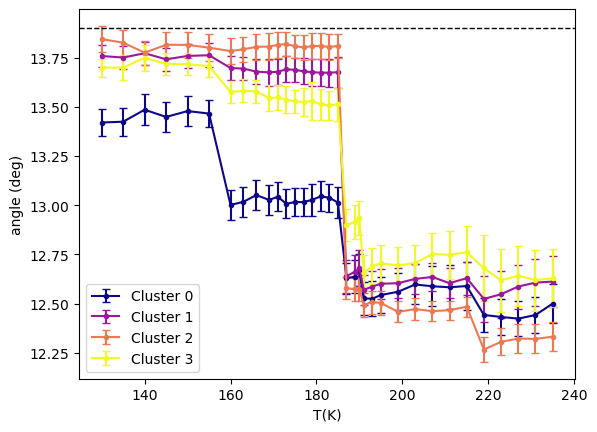

In [20]:
fig,ax=plt.subplots()
cmap = plt.get_cmap('plasma', 4)
color_list=[cmap(idx) for idx in range(4)]
for i in range(4):
    ax.errorbar(T[:]+273, np.abs(angle[i]), yerr=angle_err[i], fmt='.-', capsize=3, label=f'Cluster {i}',color=color_list[i])
ax.set_xlabel("T(K)")
ax.set_ylabel("angle (deg)")
ax.legend()
ax.axhline(y=13.9,lw=1,ls='dashed',color='k')

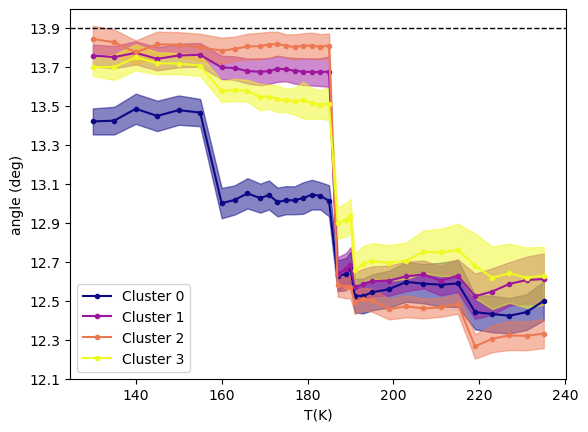

In [24]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('plasma', 4)
color_list = [cmap(idx) for idx in range(4)]

for i in range(4):
    ax.plot(T[:]+273, np.abs(angle[i]), '.-', label=f'Cluster {i}', color=color_list[i])
    ax.fill_between(T[:]+273, np.abs(angle[i]) - angle_err[i], np.abs(angle[i]) + angle_err[i],
                    color=color_list[i], alpha=0.5)

ax.set_xlabel("T(K)")
ax.set_ylabel("angle (deg)")
ax.legend()
ax.axhline(y=13.9,lw=1,ls='dashed',color='k')
ax.set_yticks(np.arange(12.1,13.9,0.2))

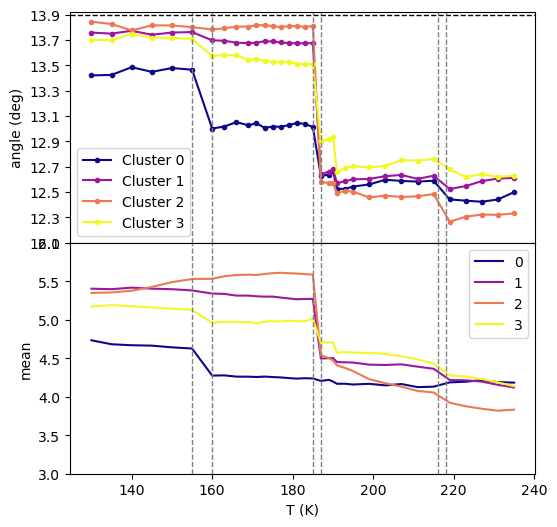

In [57]:
fig, axs = plt.subplots(2,1,figsize=(6,6),gridspec_kw=dict(hspace=0))
ax=axs[0]
cmap = plt.get_cmap('plasma', 4)
color_list = [cmap(idx) for idx in range(4)]

for i in range(4):
    ax.plot(T[:]+273, np.abs(angle[i]), '.-', label=f'Cluster {i}', color=color_list[i])
    # ax.fill_between(T[:]+273, np.abs(angle[i]) - angle_err[i], np.abs(angle[i]) + angle_err[i],
                    # color=color_list[i], alpha=0.5)

ax.set_xlabel("T(K)")
ax.set_ylabel("angle (deg)")
ax.legend()
ax.axhline(y=13.9,lw=1,ls='dashed',color='k')
ax.set_yticks(np.arange(12.1,13.9,0.2))
ax.set_xticklabels([])
# ax2=ax.twinx()
ax=axs[1]
count_pts_outlier_auto.GMM_plot_single('mean', [0,1,2,3],errorbar=False,cond=None,ax=ax,ylim=[3,6])

[ax.axvline(x=155,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=160,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=185,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=187,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=216,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=218,lw=1,ls='dashed',color='grey') for ax in axs]


In [30]:
import pickle
from GMM import GMM_model

In [56]:
with open('count_pts_outlier_auto.pickle','rb') as f:
    count_pts_outlier_auto=pickle.load(f)